In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
#sar = pd.read_json('Sarcasm_Headlines_Dataset.json')

In [2]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [3]:
data = list(parseJson('./Sarcasm_Headlines_Dataset.json'))

In [5]:
data

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [15]:
ddf = pd.DataFrame(data)

In [14]:
ddf.head()

,article_link,headline,is_sarcastic,headline_length
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,78
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,84
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,79
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,84
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,64


In [20]:
#column = ['article_link','headline','is_sarcastic']

In [62]:
#value=[]
#for i in range(len(data)):
 #   value.append([data[i]['article_link'],data[i]['headline'],data[i]['is_sarcastic']])

In [63]:
#value

[['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  "former versace store clerk sues over secret 'black code' for minority shoppers",
  0],
 ['https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  0],
 ['https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  "mom starting to fear son's web series closest thing she will have to grandchild",
  1],
 ['https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  1],
 ['https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb',
  'j.k. rowling wishes snape happy birthday in the most magical way',
  0],
 ['https://www.huffingtonpost.com/entry/advancing-the-world

In [75]:
#df = pd.DataFrame(value,columns=column)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [110]:
df.head()

,article_link,headline,is_sarcastic,headline_length
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,78
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,84
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,79
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,84
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,64


In [16]:
ddf['headline_length'] = ddf['headline'].apply(len)

TypeError: map() does not take keyword arguments

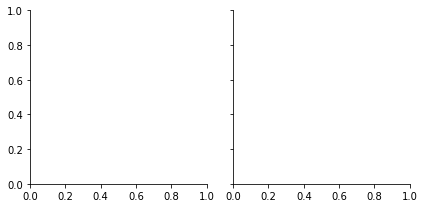

In [93]:
g = sns.FacetGrid(df,col='is_sarcastic')
g,map(plt.hist,df['headline_length'],bins=50)

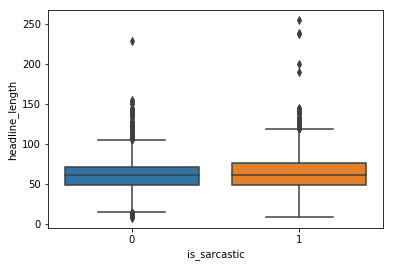

In [94]:
sns.boxplot(data=df,x='is_sarcastic',y='headline_length')

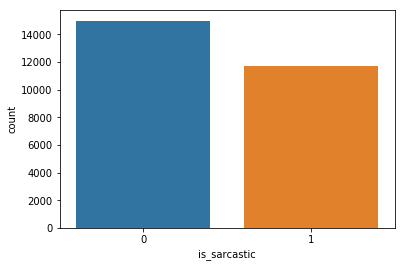

In [74]:
sns.countplot(data=df,x='is_sarcastic',label=True)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [69]:
from sklearn.model_selection import train_test_split

In [97]:
X=df['headline']
y=df['is_sarcastic']

In [99]:
X = cv.fit_transform(X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [113]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
mb = MultinomialNB()

In [115]:
mb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
predM = mb.predict(X_test)

In [123]:
from sklearn.metrics import confusion_matrix,classification_report

In [124]:
print(confusion_matrix(y_test,predM))
print(classification_report(y_test,predM))

[[3965  520]
 [ 692 2836]]
             precision    recall  f1-score   support

          0       0.85      0.88      0.87      4485
          1       0.85      0.80      0.82      3528

avg / total       0.85      0.85      0.85      8013



In [125]:
#With Random forest classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rfc = RandomForestClassifier(n_estimators=200)

In [143]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
predF = rfc.predict(X_test)

In [145]:
print(confusion_matrix(y_test,predF))
print(classification_report(y_test,predF))

[[3622  863]
 [ 683 2845]]
             precision    recall  f1-score   support

          0       0.84      0.81      0.82      4485
          1       0.77      0.81      0.79      3528

avg / total       0.81      0.81      0.81      8013



In [146]:
#naive bayes performed better slightly, even though i tried with different number of trees in random forest algo(n_estimators=100,150,200)